In [1]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Affichage et sauvegarde des figures
%matplotlib inline
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import warnings
warnings.filterwarnings("ignore")


## Génération d'un nuage de points

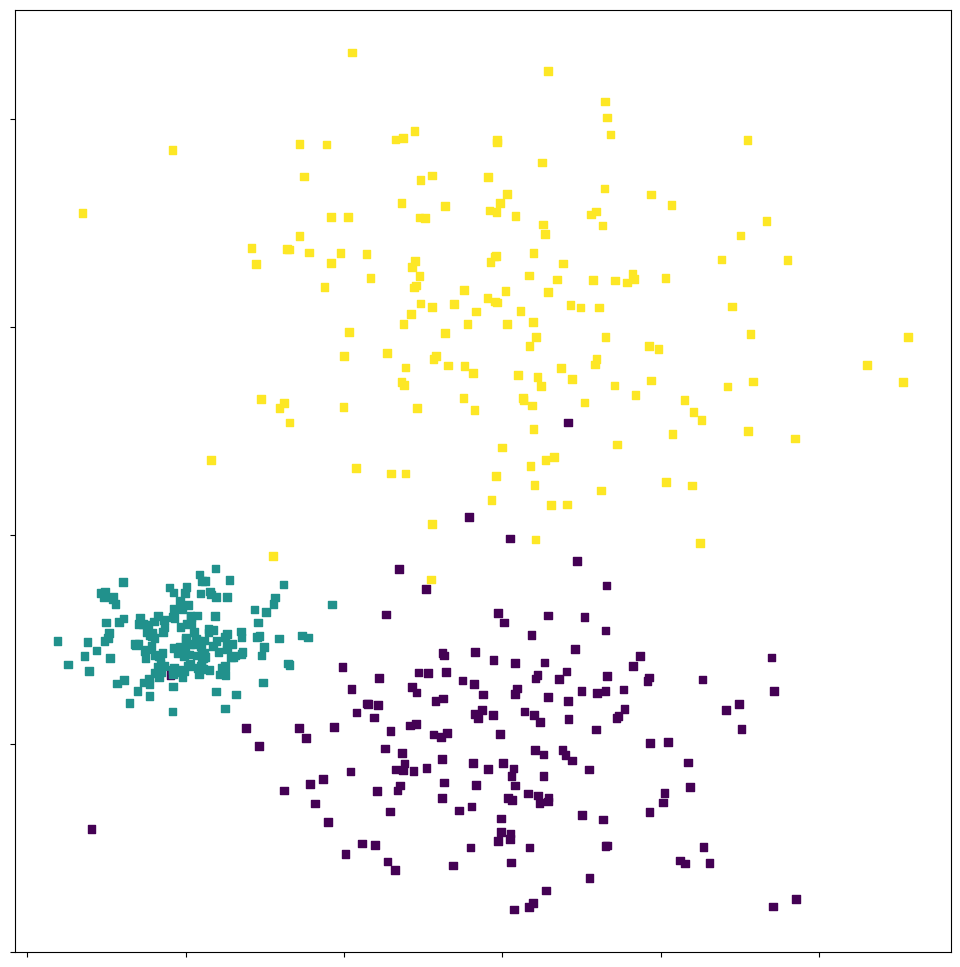

In [2]:
from sklearn.datasets import make_blobs
center = np.array(
        [[ 3,  0],[1 ,  1],[3,  4]])
cluster_std = np.array([0.8, 0.3, 1])    

X, y = make_blobs(n_samples=500,centers=center,cluster_std = cluster_std, random_state=42)
mark = 500*["."]
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y, marker = "s",s=30)
plt.tight_layout()
plt.tick_params(labelbottom=False)
plt.tick_params(labelleft=False)

### Génération d'un nuage de points à classer

In [ ]:
from ipywidgets import interact, interactive, IntSlider, Layout, interact_manual
import ipywidgets as widgets
from IPython.display import display





from sklearn.datasets import make_blobs
def func_gen(nb_points):
    center = np.array(
        [[ 0.2,  2.3],
         [-1.5 ,  2.3],
         [-2.8,  1.8],
         [-2.8,  2.8],
         [-2.8,  1.3]])
    cluster_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])    
    X, y = make_blobs(n_samples=nb_points, centers=center,cluster_std = cluster_std,random_state=42)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30);
    plt.tight_layout()
    plt.tick_params(labelbottom=False)
    plt.tick_params(labelleft=False)
    
    return (X,y)

### Définition des données

In [3]:
p=interactive(func_gen,nb_points={'50 points':50,'200 points':200,'500 points':500,'1000 points':1000})
display(p)

interactive(children=(Dropdown(description='nb_points', options={'50 points': 50, '200 points': 200, '500 poin…

In [4]:
X,y = p.result

In [3]:
from sklearn.cluster import KMeans

def func_fit(nb_classes,nb_init,center_init):
    model = KMeans(n_clusters=nb_classes,n_init=nb_init,init=center_init)
    
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plt.scatter(X[:, 0], X[:, 1],c=y, s=30,linewidths=0,cmap=plt.cm.rainbow)
    plt.title("Vraies classes")
    plt.tick_params(labelbottom=False)
    plt.tick_params(labelleft=False)
    plt.subplot(122)
    model.fit(X)
    plt.scatter(X[:, 0], X[:, 1], c=model.labels_, s=30,linewidths=0, cmap=plt.cm.rainbow)
    plt.title("K means à {0:d} classes".format(nb_classes))
    plt.tick_params(labelbottom=False)
    plt.tick_params(labelleft=False)
    plt.tight_layout() 
    return (X,y)

p=interactive(func_fit,nb_classes=(2,10,1),nb_init=(10,50,5),center_init=['k-means++', 'random'])

display(p)


NameError: name 'interactive' is not defined

In [ ]:
nb_cl = p.kwargs['nb_classes']

## Convergence vers un minimum local

In [7]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)
    
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="coolwarm")
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    plt.tick_params(labelbottom=False)
    plt.tick_params(labelleft=False)


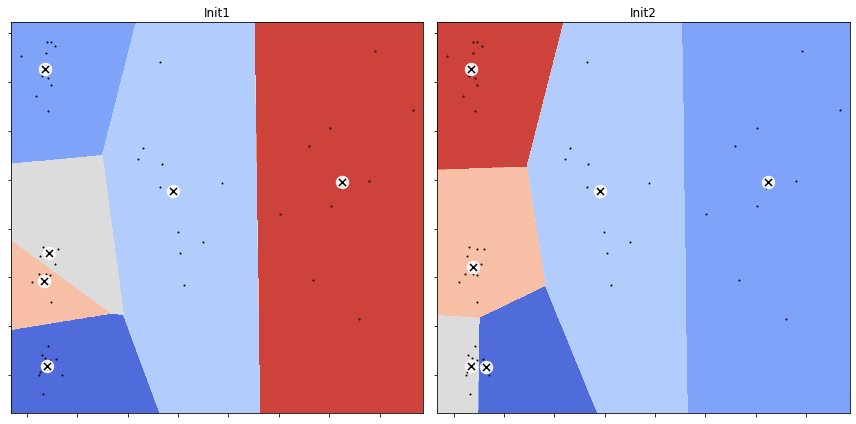

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(121)
kmeans1 = KMeans(n_clusters=nb_cl, init="random", n_init=1, random_state=41)
kmeans1.fit(X)
plot_decision_boundaries(kmeans1, X)
plt.title("Init1")

plt.subplot(122)
kmeans2 = KMeans(n_clusters=nb_cl, init="random", n_init=1, random_state=43)
kmeans2.fit(X)
plot_decision_boundaries(kmeans2, X)
plt.title("Init2")

plt.tight_layout()
plt.savefig("images/init.png",dpi=100)
plt.show()

## Cas de données non sphériques
Dans le cas de l'utilisation de la distance euclidienne, les nuages sont implicitement supposés sphériques. Cela peut conduire le k-means à une mauvaise interprétation du nuage de points

In [9]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [10]:
# Classification prenant en compte lse données
kmeans1 = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
# classification sans a priori
kmeans2 = KMeans(n_clusters=3, random_state=42)
kmeans1.fit(X)
kmeans2.fit(X);

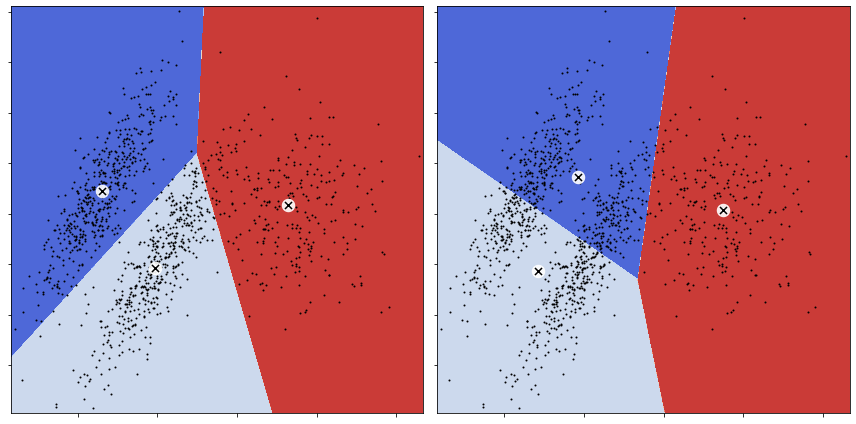

In [11]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_decision_boundaries(kmeans1, X)

plt.subplot(122)
plot_decision_boundaries(kmeans2, X)
plt.tight_layout()
plt.show()

## Illustration en classification d'images

Pour illustration, on peut appliquer l'algorithme des Kmeans aux données MNIST.

In [4]:
from sklearn.datasets import fetch_openml
Xmnist, ymnist= fetch_openml('mnist_784', version=1, return_X_y=True)
ymnist=ymnist.astype(int)

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(Xmnist)
kmeans.cluster_centers_.shape

# Centres de classe
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

AttributeError: 'NoneType' object has no attribute 'split'

Certains chiffres sont facilement reconnaissables, certains sont oubliés. Kmeans est une méthode trop simple (séparation linéaire) pour aborder de manière efficace ce type de problème. De plus, étant basé sur EM, il est assuré de converger, mais seulement vers un minimum local. 

<a name='spectral'></a>